<a href="https://colab.research.google.com/github/shbnm93/Data-Science-Projects/blob/main/Working_with_Video_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

from glob import glob

import IPython.display as ipd
from tqdm import tqdm

import subprocess

plt.style.use('ggplot')

In [ ]:
# Input and output file paths
input_file_path = 'Video.mp4'
output_file_path = 'Processed_Video.mp4'

In [ ]:
# Run ffmpeg command to re-encode the video
subprocess.run(['ffmpeg',
                '-i',
                input_file_path,
                '-qscale',
                '0',
                output_file_path,
                '-loglevel',
                'quiet']
              )

CompletedProcess(args=['ffmpeg', '-i', 'Video.mp4', '-qscale', '0', 'Processed_Video.mp4', '-loglevel', 'quiet'], returncode=1)

In [ ]:
!ls -GFlash --color

total 6.2M
4.0K drwxr-xr-x 1 root 4.0K Mar  1 21:17 ./
4.0K drwxr-xr-x 1 root 4.0K Mar  1 21:02 ../
4.0K drwxr-xr-x 4 root 4.0K Feb 28 14:26 .config/
2.8M -rw-r--r-- 1 root 2.8M Mar  1 21:18 Processed_Video.mp4
4.0K drwxr-xr-x 1 root 4.0K Feb 28 14:27 sample_data/
3.4M -rw-r--r-- 1 root 3.4M Mar  1 21:03 Video.mp4


# Display Video in Notebook

In [ ]:
# Specify the path to the video file
video_path = 'Video.mp4'

# Display the video
ipd.Video(video_path, width=700)

# Open the Video and Read Metadata

In [ ]:
# Load video capture
cap = cv2.VideoCapture(video_path)

In [ ]:
# Check if the video capture object was successfully opened
if not cap.isOpened():
    print("Error: Unable to open video file.")
    # You may choose to exit the program or handle the error in another way

In [ ]:
# Total number of frames in video
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

In [ ]:
# Video height and width
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
print(f'Height {height}, Width {width}')

Height 1080, Width 1920


In [ ]:
# Get frames per second
fps = cap.get(cv2.CAP_PROP_FPS)
print(f'FPS : {fps:0.2f}')

FPS : 25.00


In [ ]:
# Check if the video capture object is open before releasing it
if cap.isOpened():
    cap.release()

# Pulling in Images from Video

In [ ]:
cap = cv2.VideoCapture('Video.mp4')
ret, img = cap.read()
print(f'Returned {ret} and img of shape {img.shape}')

Returned True and img of shape (1080, 1920, 3)


In [ ]:
## Helper function for plotting opencv images in notebook
def display_cv2_img(img, figsize=(10, 10)):
    img_ = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig, ax = plt.subplots(figsize=figsize)
    ax.imshow(img_)
    ax.axis("off")

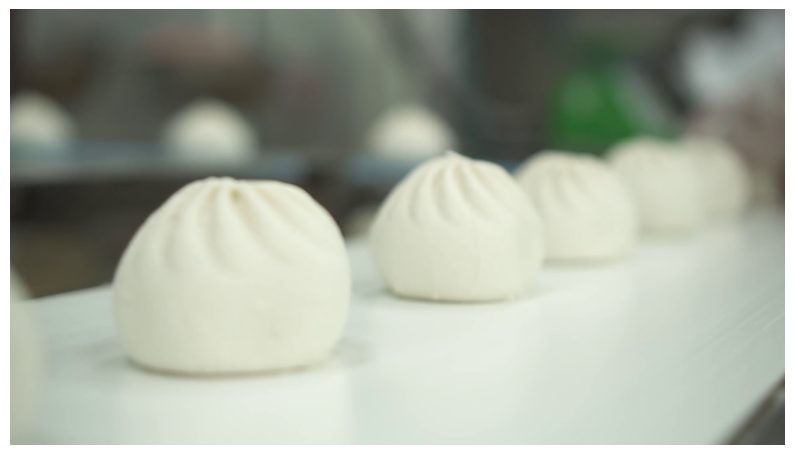

In [ ]:
display_cv2_img(img)

In [ ]:
cap.release()

# Display multiple frames from the video

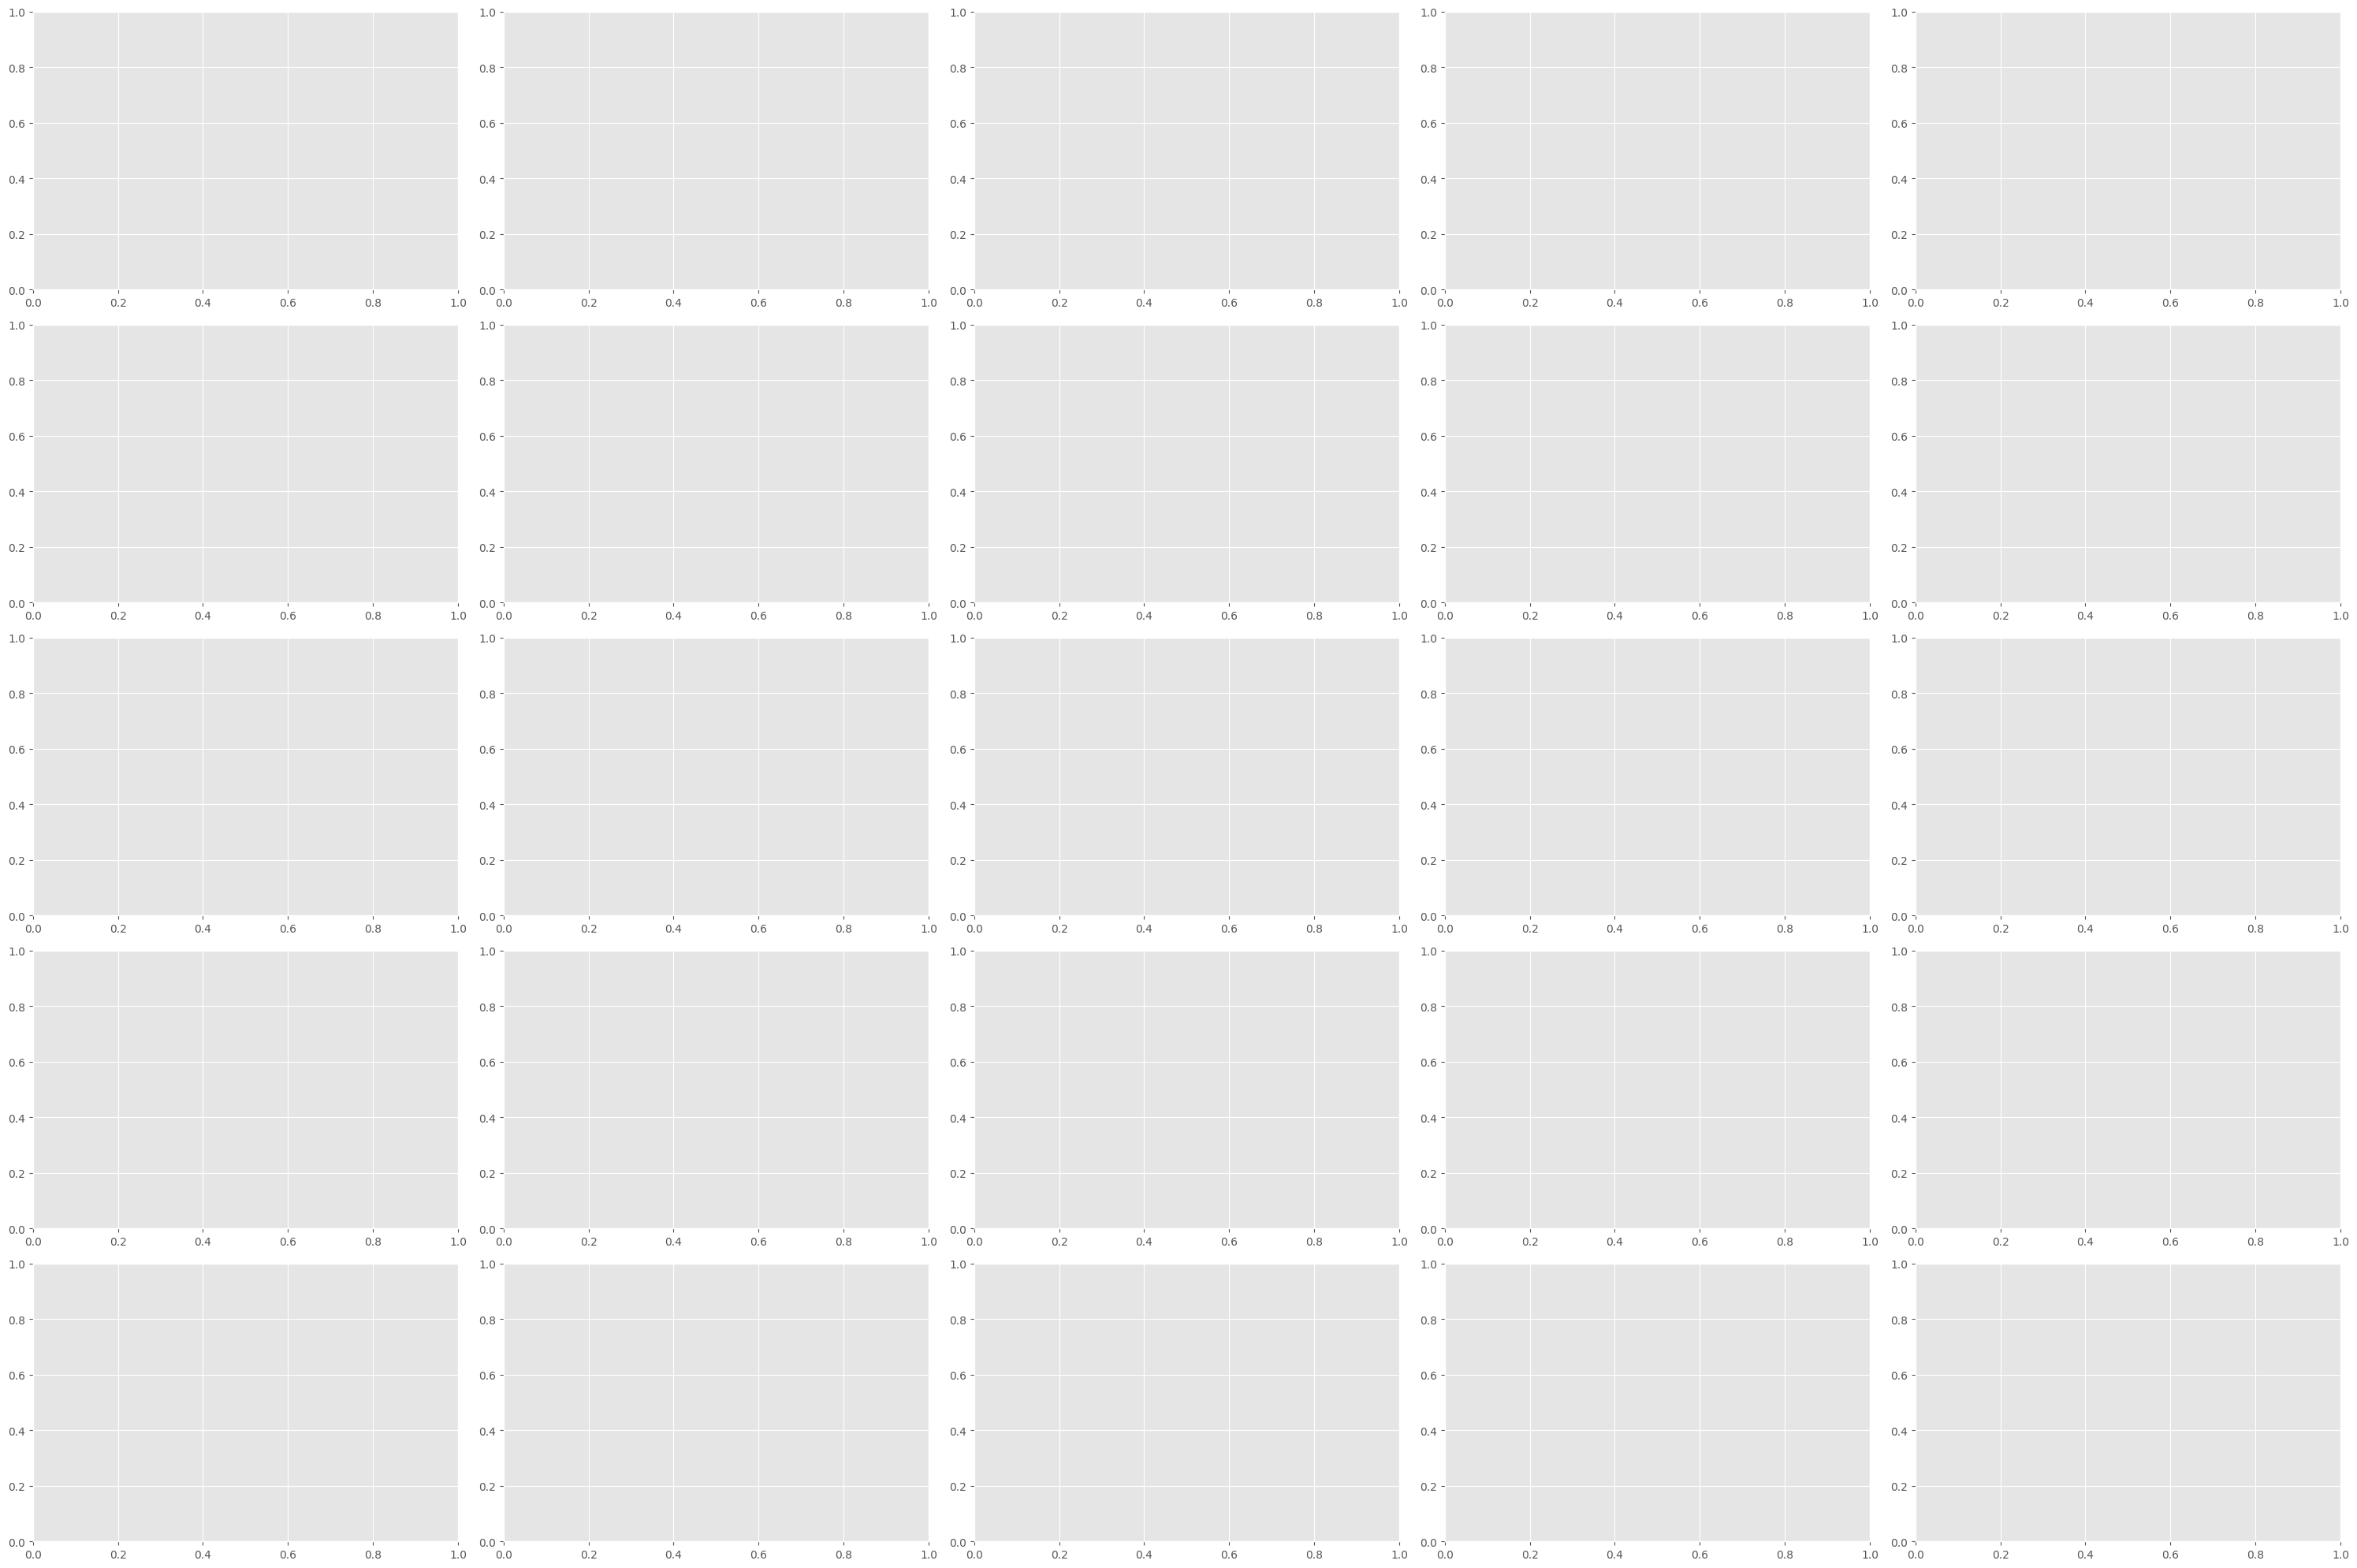

In [ ]:
# Get the total number of frames in the video
n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# Create a grid of subplots
fig, axs = plt.subplots(5, 5, figsize=(30, 20))
axs = axs.flatten()

# Iterate over frames
img_idx = 0
for frame in range(n_frames):
    # Read the frame
    ret, img = cap.read()

    # Check if the frame reading was successful
    if not ret:
        break

    # Display every 100th frame
    if frame % 100 == 0:
        # Convert BGR to RGB for matplotlib
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Display the frame
        axs[img_idx].imshow(img_rgb)
        axs[img_idx].set_title(f'Frame: {frame}')
        axs[img_idx].axis('off')
        img_idx += 1

        # Break if all subplots are filled
        if img_idx >= 25:
            break

# Release the video capture object
cap.release()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Add Annotations to Video Images

In [ ]:
import pandas as pd

# Read the CSV file
labels = pd.read_csv('../input/driving-video-with-object-tracking/mot_labels.csv', low_memory=False)

# Filter the labels for a specific video
video_labels = labels[labels['videoName'] == "026c7465-309f6d33"].reset_index(drop=True).copy()

# Calculate the corresponding video frame for each label
video_labels["video_frame"] = (video_labels["frameIndex"] * 11.9).round().astype("int")

# Print the first few rows of the resulting DataFrame
print(video_labels.head())

FileNotFoundError: [Errno 2] No such file or directory: '../input/driving-video-with-object-tracking/mot_labels.csv'

In [ ]:
video_labels["category"].value_counts()

NameError: name 'video_labels' is not defined

In [ ]:
# Pull frame 1035

cap = cv2.VideoCapture("Video.mp4")
n_frames = int(cap.get(cv2.cv2.CAP_PROP_FRAME_COUNT))

img_idx = 0
for frame in range(n_frames):
    ret, img = cap.read()
    if ret == False:
        break
    if frame == 1035:
        break
cap.release()

AttributeError: module 'cv2' has no attribute 'cv2'

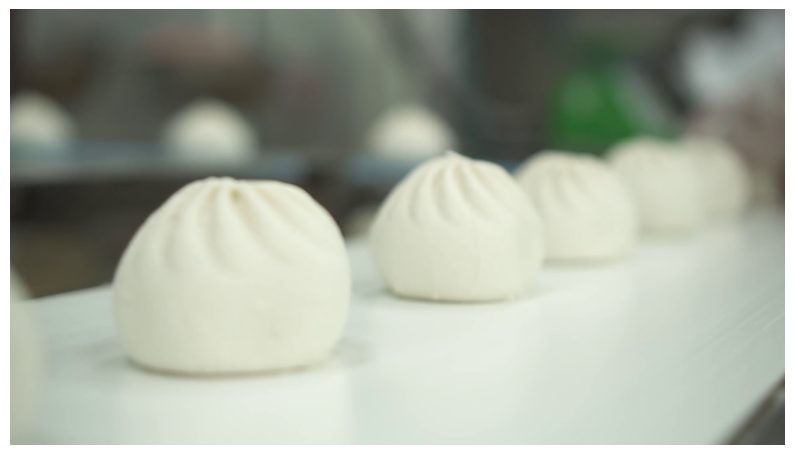

In [ ]:
display_cv2_img(img)

In [ ]:
img_example = img.copy()
frame_labels = video_labels.query('video_frame == 1035')
for i, d in frame_labels.iterrows():
    pt1 = int(d['box2d.x1']), int(d['box2d.y1'])
    pt2 = int(d['box2d.x2']), int(d['box2d.y2'])
    cv2.rectangle(img_example, pt1, pt2, (0, 0, 255), 3)

display_cv2_img(img_example)

NameError: name 'video_labels' is not defined

# Displaying Colored by Category

In [ ]:
color_map = {
    "car": (0, 0, 255),
    "truck": (0, 0, 100),
    "pedestrian": (255, 0, 0),
    "other vehicle": (0, 0, 150),
    "rider": (200, 0, 0),
    "bicycle": (0, 255, 0),
    "other person": (200, 0, 0),
    "trailer": (0, 150, 150),
    "motorcycle": (0, 150, 0),
    "bus": (0, 0, 100),
}

img_example = img.copy()
frame_labels = video_labels.query('video_frame == 1035')
for i, d in frame_labels.iterrows():
    pt1 = int(d['box2d.x1']), int(d['box2d.y1'])
    pt2 = int(d['box2d.x2']), int(d['box2d.y2'])
    color = color_map[d['category']]
    cv2.rectangle(img_example, pt1, pt2, color, 3)

display_cv2_img(img_example)

NameError: name 'video_labels' is not defined

## Adding Text

In [ ]:
frame_labels = video_labels.query("video_frame == @frame")
font = cv2.FONT_HERSHEY_TRIPLEX
img_example = img.copy()
for i, d in frame_labels.iterrows():
    pt1 = int(d["box2d.x1"]), int(d["box2d.y1"])
    pt2 = int(d["box2d.x2"]), int(d["box2d.y2"])
    color = color_map[d["category"]]
    img_example = cv2.rectangle(img_example, pt1, pt2, color, 3)
    pt_text = int(d["box2d.x1"]) + 5, int(d["box2d.y1"] + 10)
    img_example = cv2.putText(img_example, d["category"], pt_text, font, 0.5, color)
display_cv2_img(img_example)
cap.release()

NameError: name 'video_labels' is not defined

# Label and output Annotated Video

In [ ]:
def add_annotations(img, frame, video_labels):
    max_frame = video_labels.query("video_frame <= @frame")["video_frame"].max()
    frame_labels = video_labels.query("video_frame == @max_frame")
    for i, d in frame_labels.iterrows():
        pt1 = int(d["box2d.x1"]), int(d["box2d.y1"])
        pt2 = int(d["box2d.x2"]), int(d["box2d.y2"])
        color = color_map[d["category"]]
        img = cv2.rectangle(img, pt1, pt2, color, 3)
    return img

In [ ]:
!rm -r out_test.mp4

rm: cannot remove 'out_test.mp4': No such file or directory


In [ ]:
VIDEO_CODEC = "mp4v"
fps = 59.94
width = 1280
height = 720
out = cv2.VideoWriter("out_test.mp4",
                cv2.VideoWriter_fourcc(*VIDEO_CODEC),
                fps,
                (width, height))

cap = cv2.VideoCapture("026c7465-309f6d33.mp4")
n_frames = int(cap.get(cv2.cv2.CAP_PROP_FRAME_COUNT))

for frame in tqdm(range(n_frames), total=n_frames):
    ret, img = cap.read()
    if ret == False:
        break
    img = add_annotations(img, frame, video_labels)
    out.write(img)
out.release()
cap.release()

AttributeError: module 'cv2' has no attribute 'cv2'

In [ ]:
!ls -GFlash -color

total 6.2M
3.4M -rw-r--r-- 1 root 3.4M Mar  1 21:03 Video.mp4
4.0K drwxr-xr-x 1 root 4.0K Feb 28 15:14 sample_data/
2.8M -rw-r--r-- 1 root 2.8M Mar  1 21:18 Processed_Video.mp4
4.0K -rw-r--r-- 1 root   44 Mar  1 21:32 out_test.mp4
4.0K drwxr-xr-x 4 root 4.0K Feb 28 15:14 .config/
4.0K drwxr-xr-x 1 root 4.0K Mar  1 21:03 ../
4.0K drwxr-xr-x 1 root 4.0K Mar  1 21:32 ./


# Convert our labeled output to mp4 and view

In [ ]:
tmp_output_path = "out_test.mp4"
output_path = "out_test_compressed.mp4"
subprocess.run(
    [
        "ffmpeg",
        "-i",
        tmp_output_path,
        "-crf",
        "18",
        "-preset",
        "veryfast",
        "-vcodec",
        "libx264",
        output_path,
        '-loglevel',
        'quiet'
    ]
)

CompletedProcess(args=['ffmpeg', '-i', 'out_test.mp4', '-crf', '18', '-preset', 'veryfast', '-vcodec', 'libx264', 'out_test_compressed.mp4', '-loglevel', 'quiet'], returncode=1)

In [ ]:
!ls -GFlash --color

total 6.2M
4.0K drwxr-xr-x 1 root 4.0K Mar  1 21:32 ./
4.0K drwxr-xr-x 1 root 4.0K Mar  1 21:02 ../
4.0K drwxr-xr-x 4 root 4.0K Feb 28 14:26 .config/
4.0K -rw-r--r-- 1 root   44 Mar  1 21:32 out_test.mp4
2.8M -rw-r--r-- 1 root 2.8M Mar  1 21:18 Processed_Video.mp4
4.0K drwxr-xr-x 1 root 4.0K Feb 28 14:27 sample_data/
3.4M -rw-r--r-- 1 root 3.4M Mar  1 21:03 Video.mp4


In [ ]:
ipd.Video('out_test_compressed.mp4', width=600)

ValueError: To embed videos, you must pass embed=True (this may make your notebook files huge)
Consider passing Video(url='...')